In [1]:
import numpy as np
from ia_mri_tools.signal_stats import normalize_local_3d
from ia_mri_tools.features import laplace, grad, mean, stddev

%run init_notebook.py
% matplotlib inline

# Load the data and contrast normalize
t1 = load_data('T1r')
raw = normalize_local_3d(t1)

# dimensions
nx, ny, nz = raw.shape

# Slice for display for only one slice
z = 120

# Scales at which to compute the features
scales = [1,2,4,8]
ns = len(scales)

In [2]:
# Compute the Laplacian pyramid
M = np.zeros((nx, ny, ns))
SD = np.zeros((nx, ny, ns))
GM = np.zeros((nx, ny, ns))
L = np.zeros((nx, ny, ns))
GL = np.zeros((nx, ny, ns))

for n in range(ns):
    M[:,:,n] = mean(raw, scales[n])[:,:,z]
    SD[:,:,n] = stddev(raw, scales[n])[:,:,z]
    GM[:,:,n] = grad(raw, scales[n])[:,:,z]
    L[:,:,n] = laplace(raw, scales[n])[:,:,z]
    GL[:,:,n] = grad(laplace(raw, scales[n]),scales[n])[:,:,z]
    

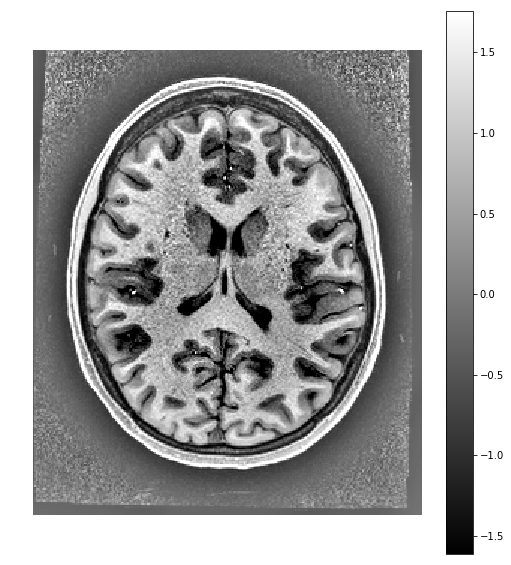

In [3]:
plt.figure(figsize=[40,10])
im_show_scale(raw[:,:,z], 1,4,1)

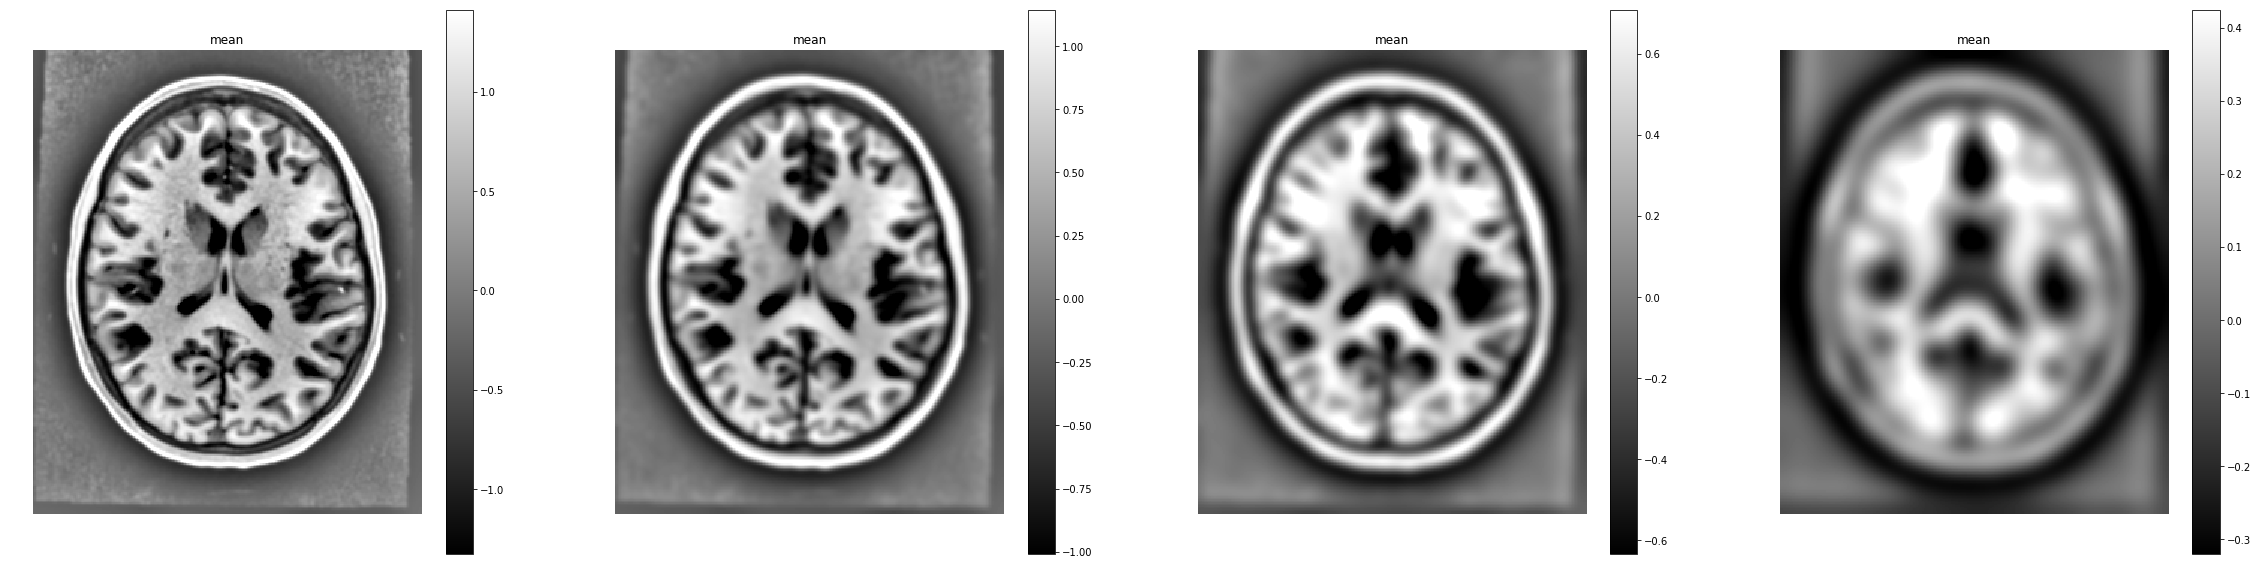

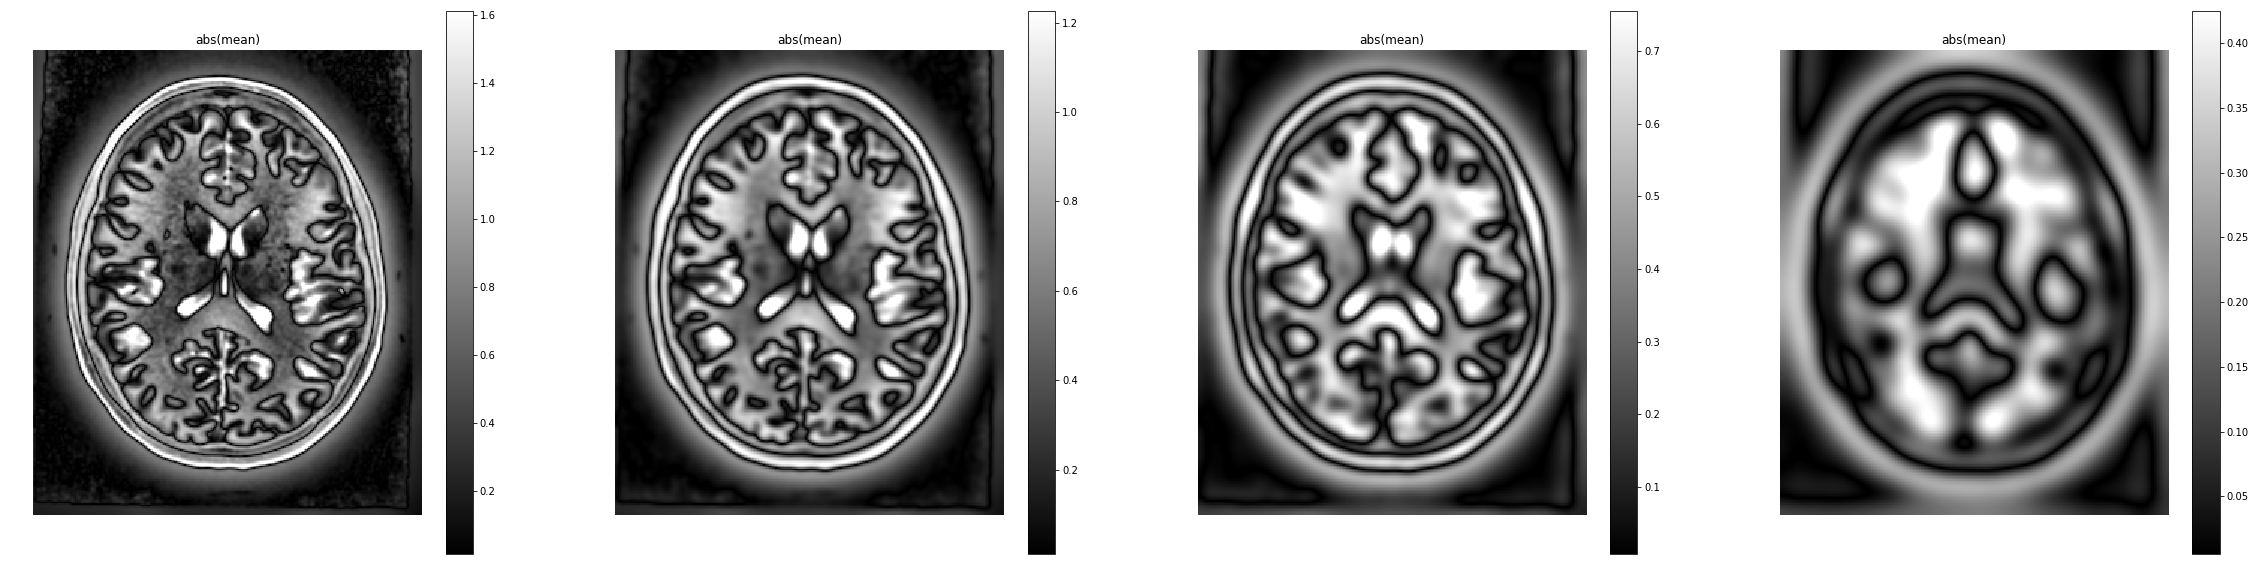

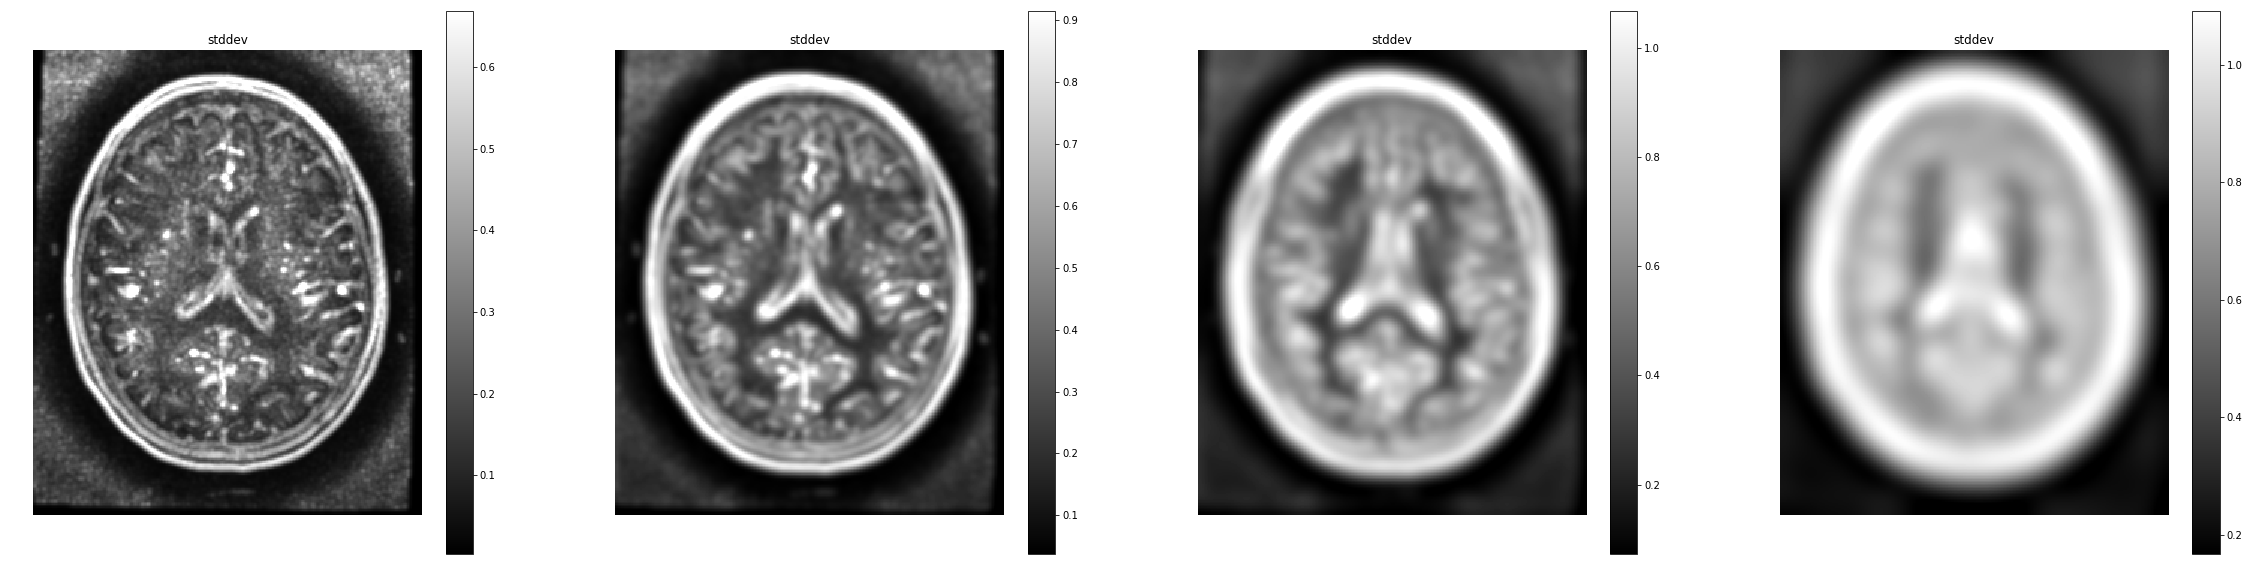

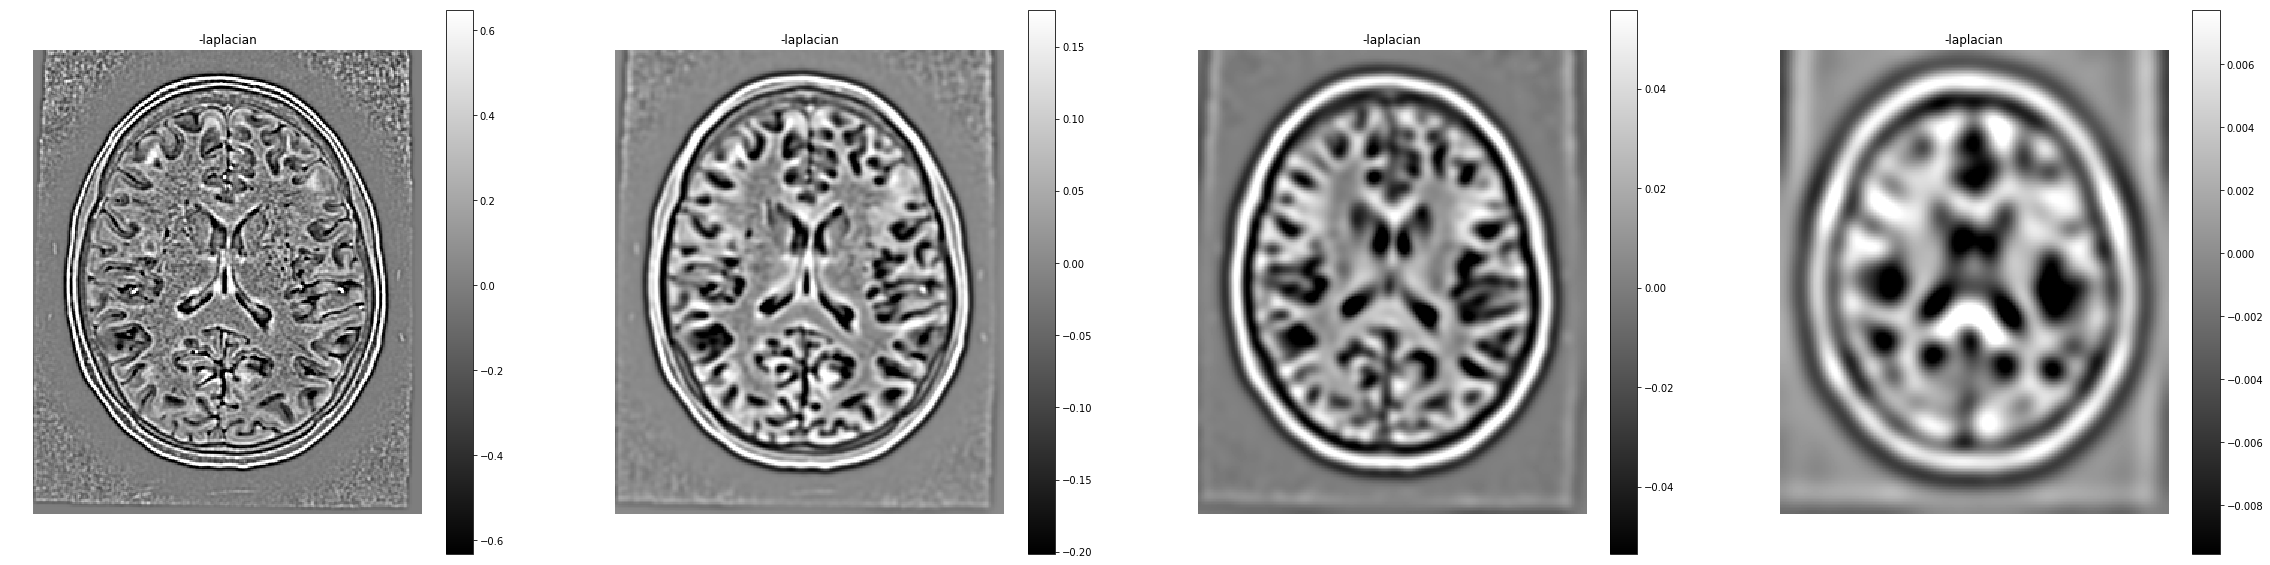

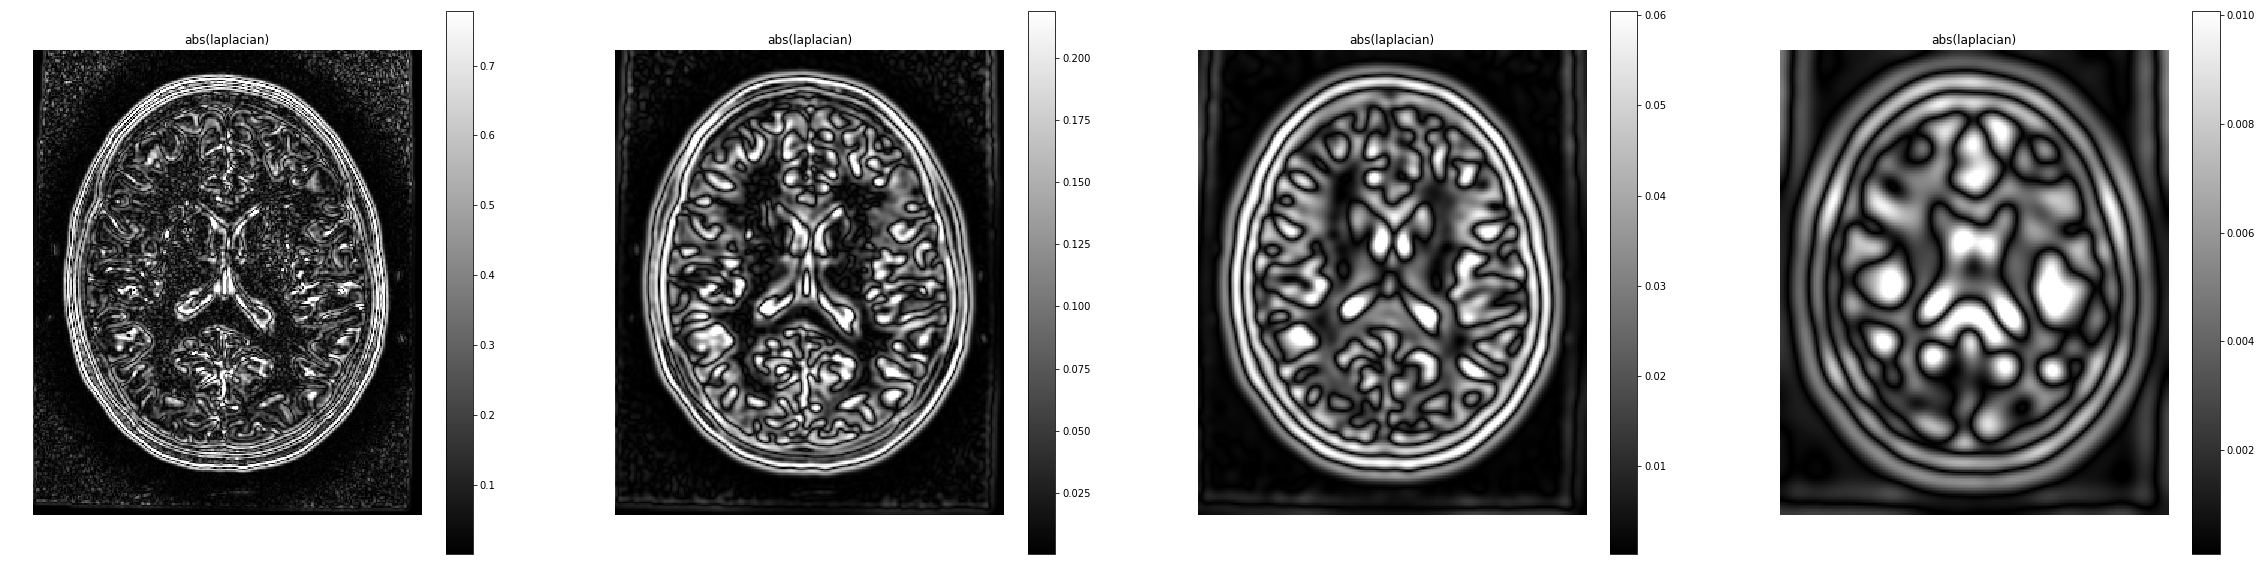

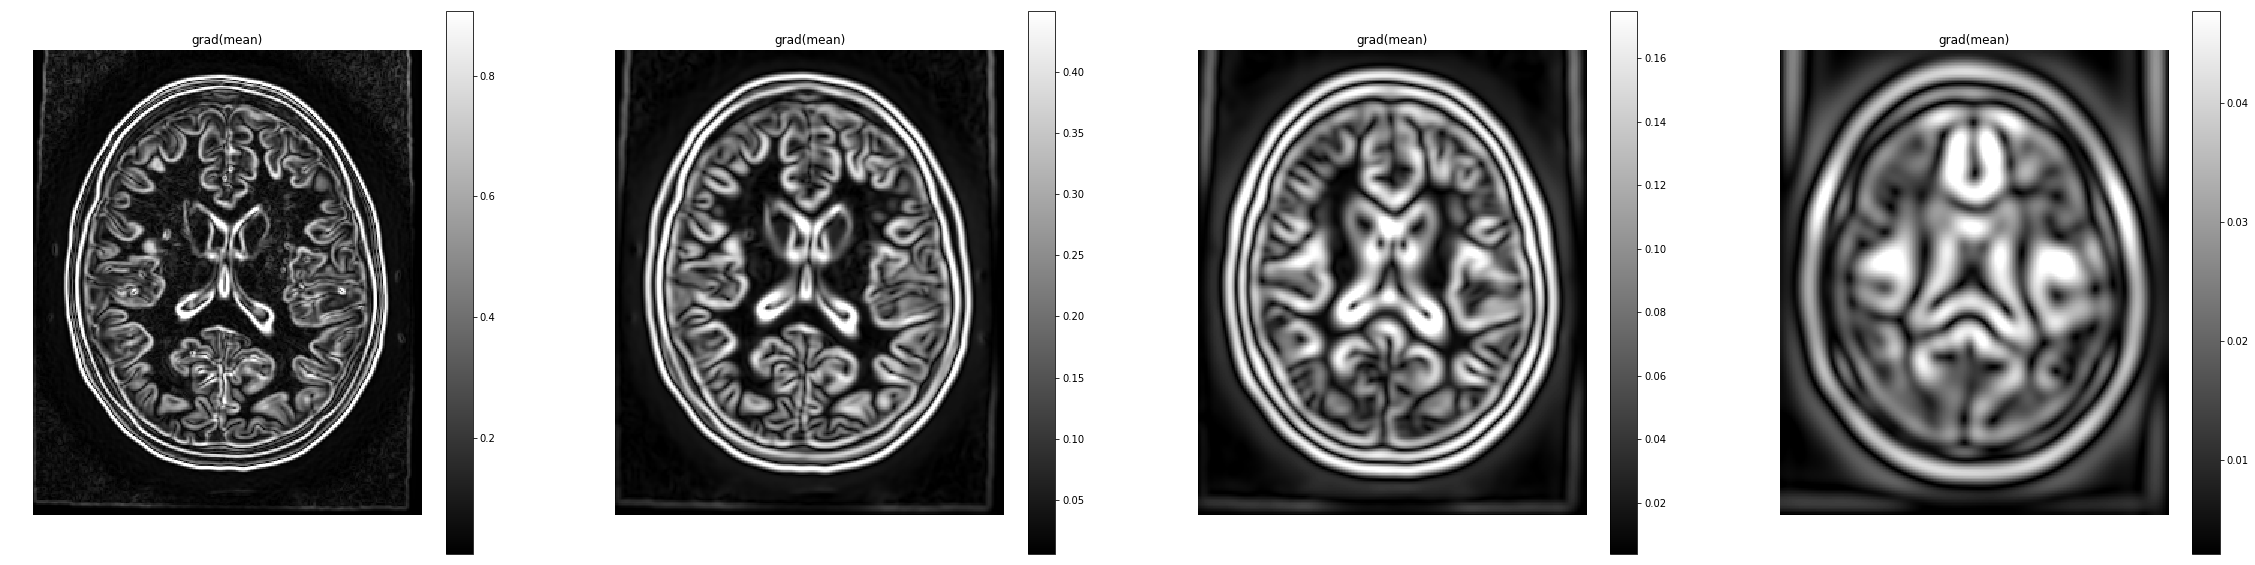

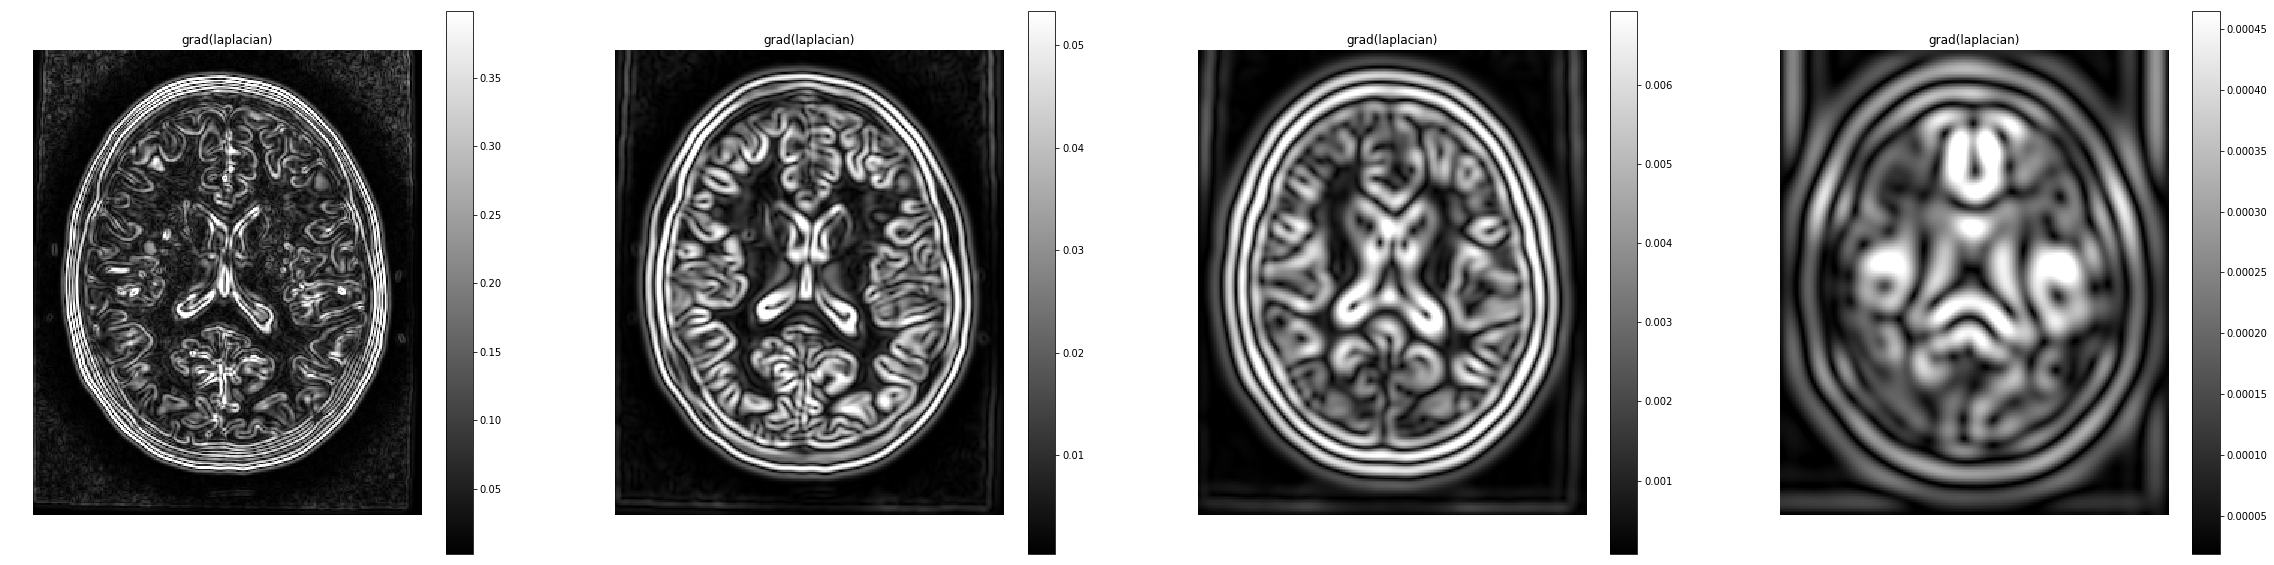

In [4]:
plt.figure(figsize=[40,10])
for n in range(ns):
    im_show_scale(M[:,:,n], 1,4,n+1, 'mean')

plt.figure(figsize=[40,10])
for n in range(ns):
    im_show_scale(np.abs(M[:,:,n]), 1,4,n+1, 'abs(mean)')

plt.figure(figsize=[40,10])
for n in range(ns):
    im_show_scale(SD[:,:,n], 1,4,n+1, 'stddev')

plt.figure(figsize=[40,10])
for n in range(ns):
    im_show_scale(L[:,:,n], 1,4,n+1, '-laplacian')

plt.figure(figsize=[40,10])
for n in range(ns):
    im_show_scale(np.abs(L[:,:,n]), 1,4,n+1, 'abs(laplacian)')

plt.figure(figsize=[40,10])
for n in range(ns):
    im_show_scale(GM[:,:,n], 1,4,n+1, 'grad(mean)')

plt.figure(figsize=[40,10])
for n in range(ns):
    im_show_scale(GL[:,:,n], 1,4,n+1, 'grad(laplacian)')


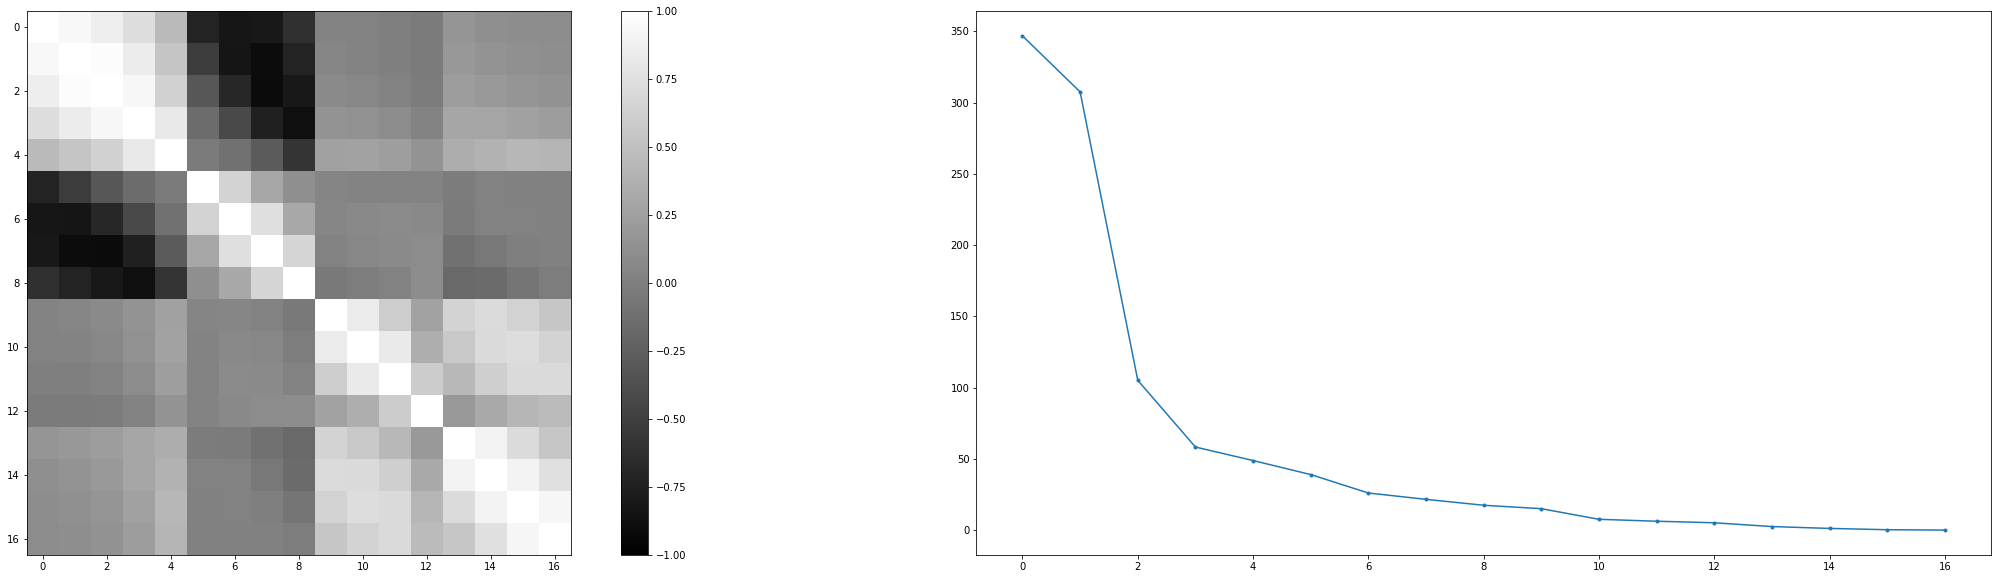

In [42]:
F = np.column_stack((raw[:,:,z].reshape(nx*ny,1), M.reshape(nx*ny, ns), L.reshape(nx*ny,ns), GM.reshape(nx*ny, ns), SD.reshape(nx*ny,ns)))
C = np.corrcoef(F, rowvar=False)
s = np.linalg.svd(F, compute_uv=False, full_matrices=False)

plt.figure(figsize=[40,10])
plt.subplot(1,2,1)
plt.imshow(C, cmap='gray', vmin=-1.0, vmax=1.0)
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(s, '.-')

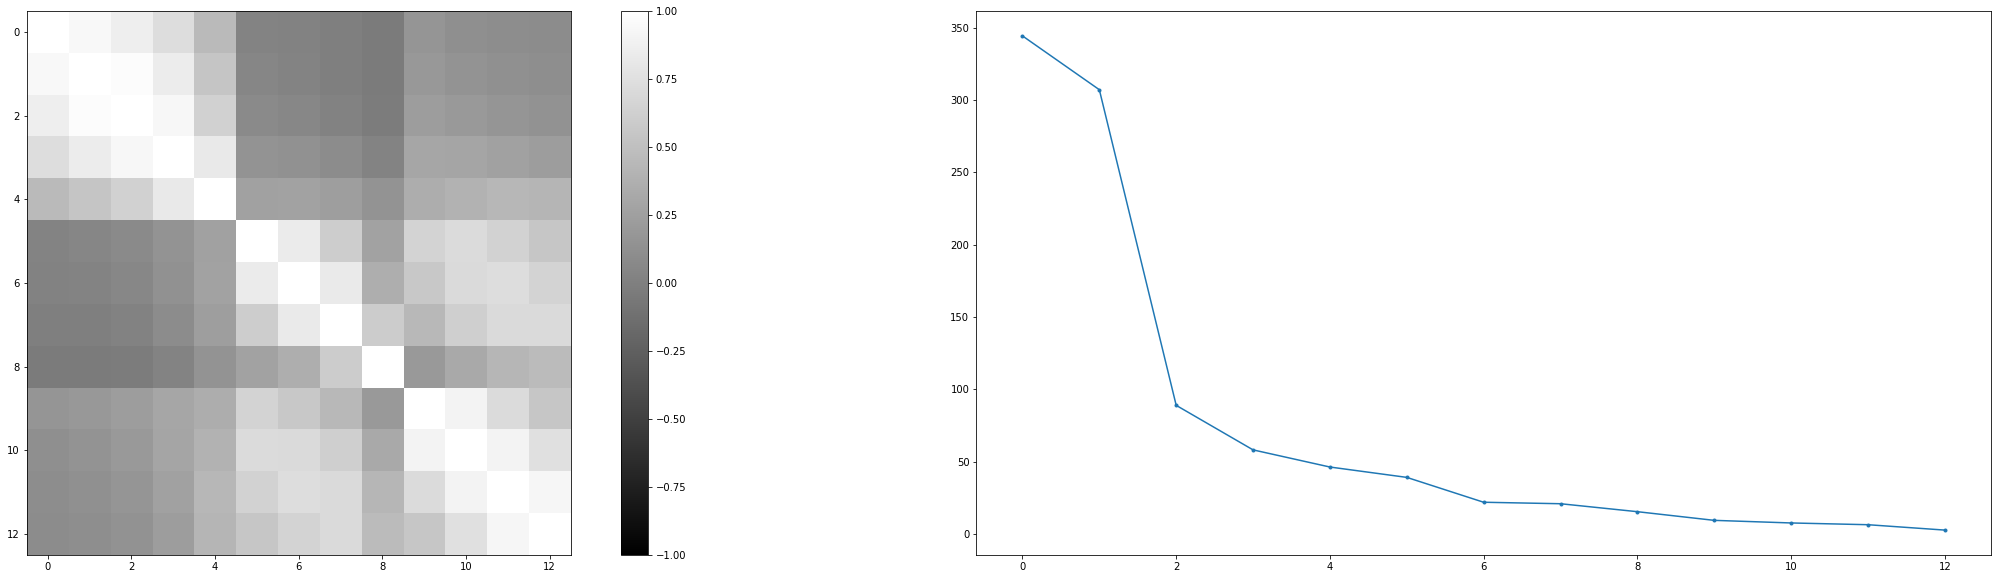

In [43]:
F = np.column_stack((raw[:,:,z].reshape(nx*ny,1), M.reshape(nx*ny, ns), GM.reshape(nx*ny, ns), SD.reshape(nx*ny,ns)))
C = np.corrcoef(F, rowvar=False)
s = np.linalg.svd(F, compute_uv=False, full_matrices=False)

plt.figure(figsize=[40,10])
plt.subplot(1,2,1)
plt.imshow(C, cmap='gray', vmin=-1.0, vmax=1.0)
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(s, '.-')

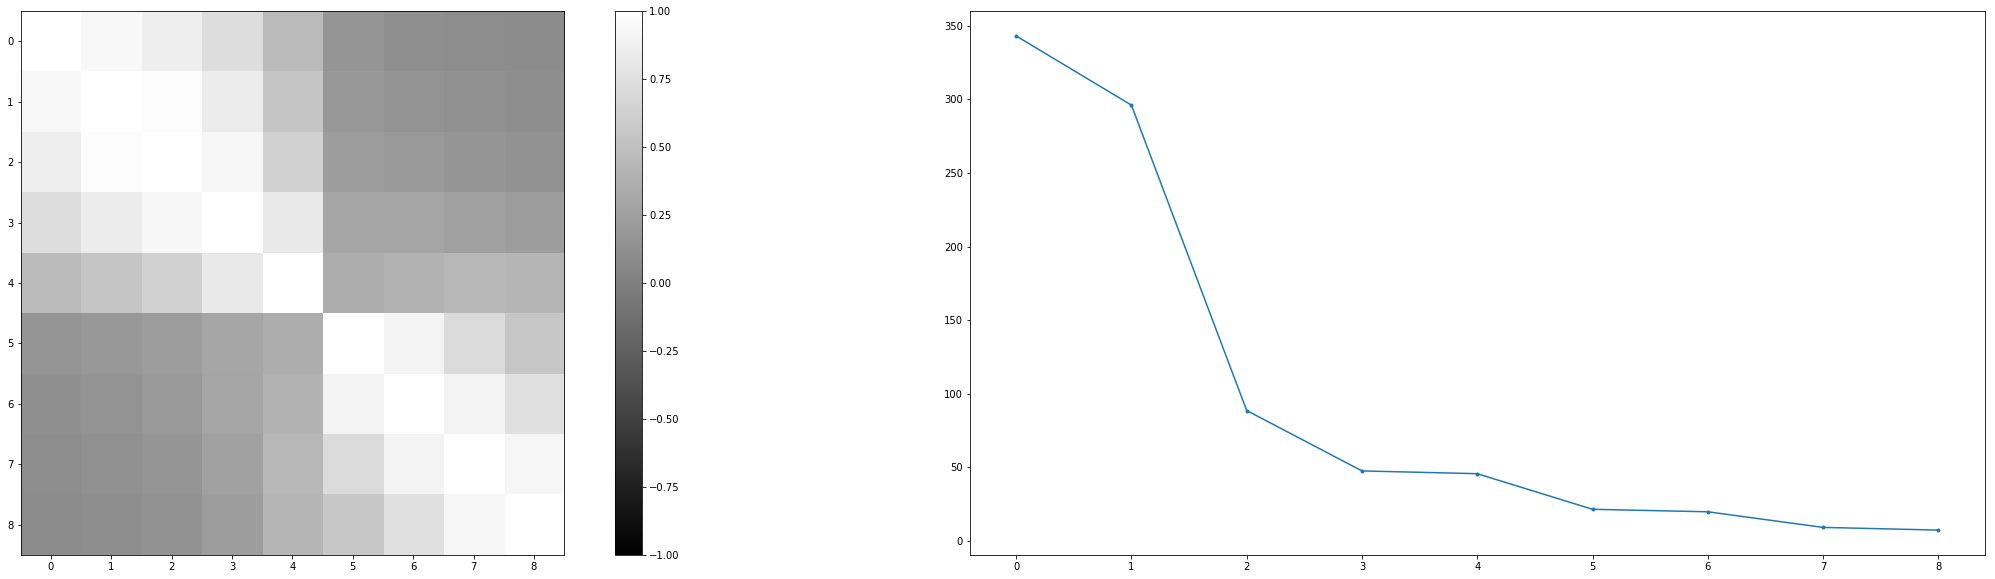

In [41]:
F = np.column_stack((raw[:,:,z].reshape(nx*ny,1), M.reshape(nx*ny, ns), SD.reshape(nx*ny, ns)))
C = np.corrcoef(F, rowvar=False)
s = np.linalg.svd(F, compute_uv=False, full_matrices=False)

plt.figure(figsize=[40,10])
plt.subplot(1,2,1)
plt.imshow(C, cmap='gray', vmin=-1.0, vmax=1.0)
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(s, '.-')

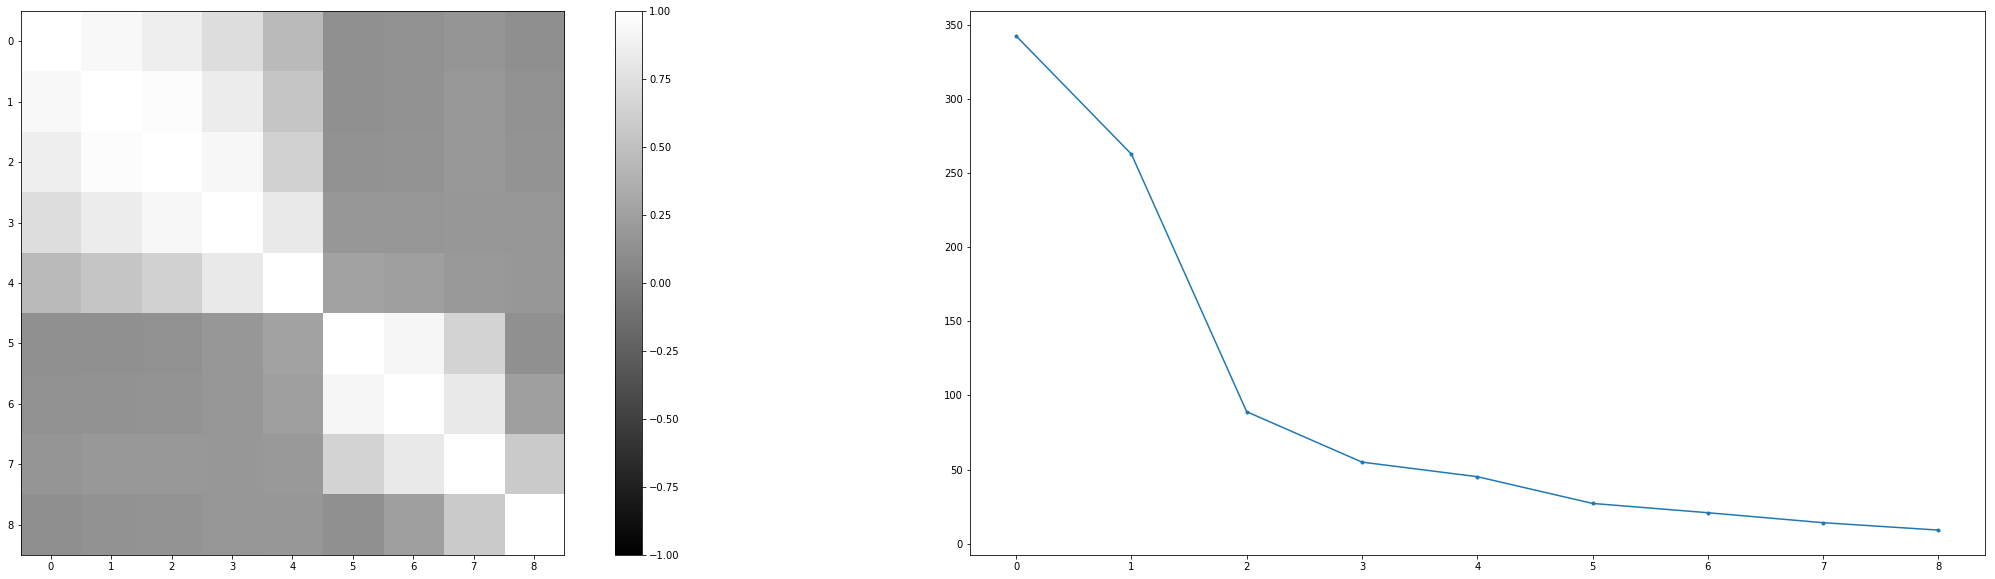

In [46]:
F = np.column_stack((raw[:,:,z].reshape(nx*ny,1), M.reshape(nx*ny, ns), np.abs(M.reshape(nx*ny, ns))))
C = np.corrcoef(F, rowvar=False)
s = np.linalg.svd(F, compute_uv=False, full_matrices=False)

plt.figure(figsize=[40,10])
plt.subplot(1,2,1)
plt.imshow(C, cmap='gray', vmin=-1.0, vmax=1.0)
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(s, '.-')

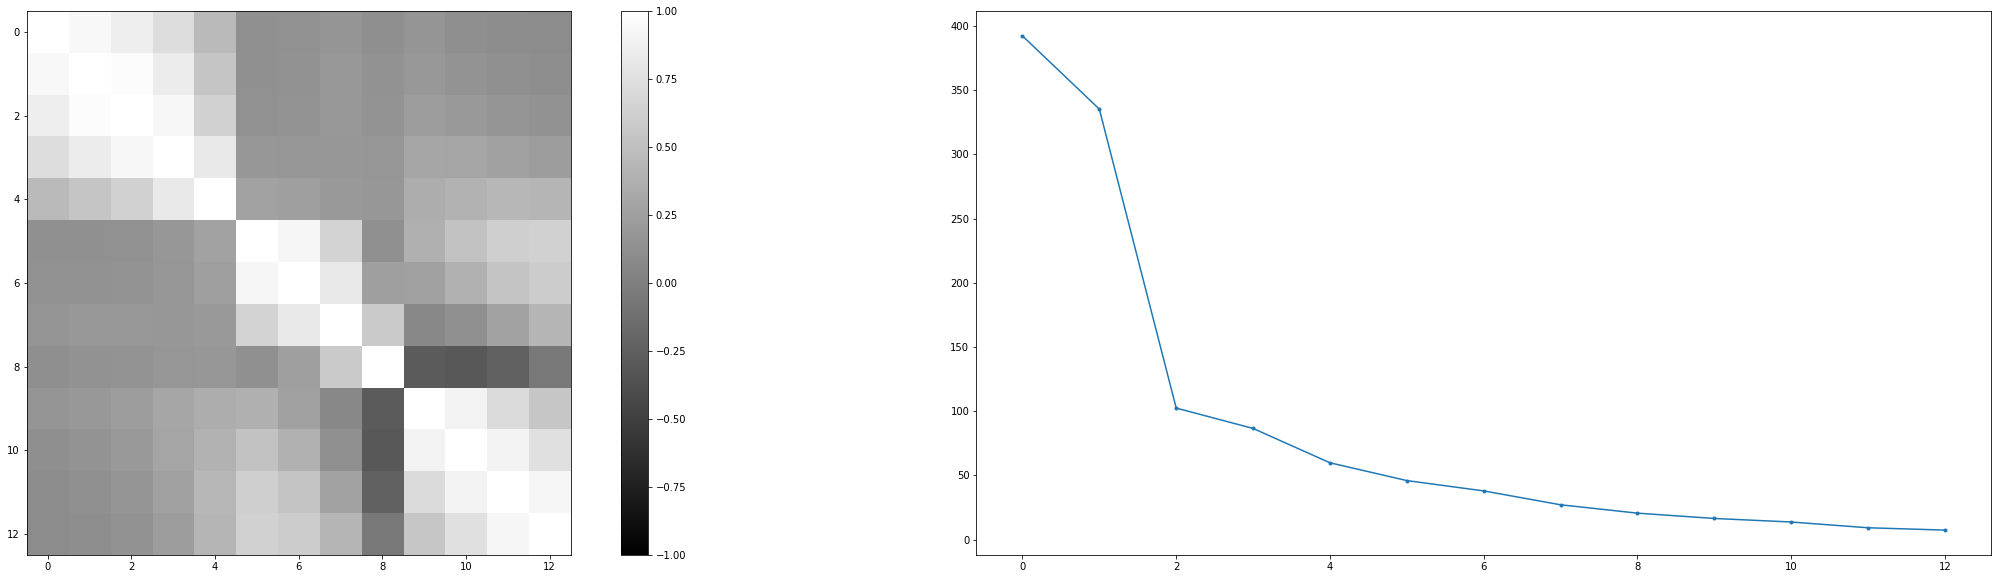

In [44]:
F = np.column_stack((raw[:,:,z].reshape(nx*ny,1), M.reshape(nx*ny, ns), np.abs(M.reshape(nx*ny, ns)), SD.reshape(nx*ny, ns)))
C = np.corrcoef(F, rowvar=False)
s = np.linalg.svd(F, compute_uv=False, full_matrices=False)

plt.figure(figsize=[40,10])
plt.subplot(1,2,1)
plt.imshow(C, cmap='gray', vmin=-1.0, vmax=1.0)
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(s, '.-')

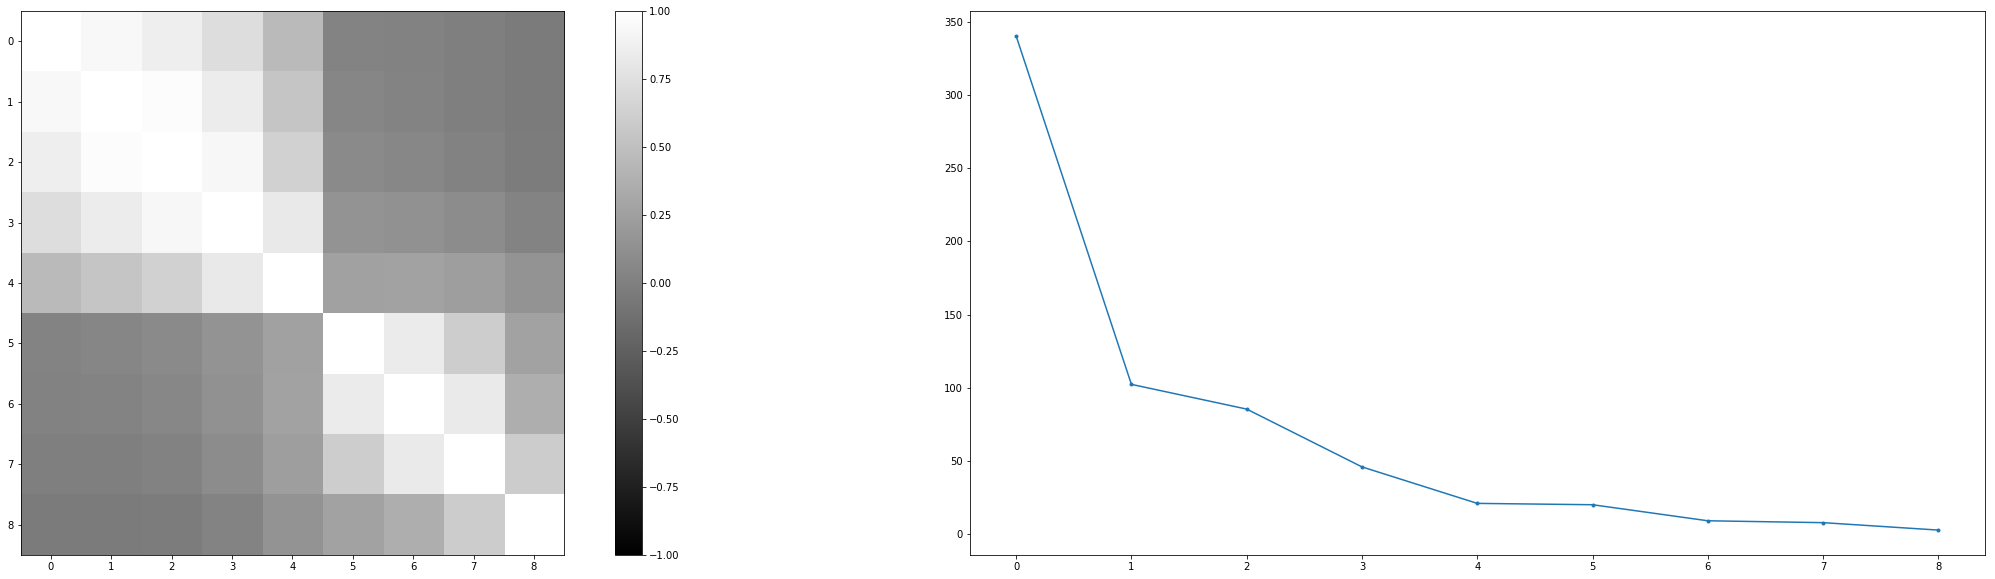

In [40]:
F = np.column_stack((raw[:,:,z].reshape(nx*ny,1), M.reshape(nx*ny, ns), GM.reshape(nx*ny, ns)))
C = np.corrcoef(F, rowvar=False)
s = np.linalg.svd(F, compute_uv=False, full_matrices=False)

plt.figure(figsize=[40,10])
plt.subplot(1,2,1)
plt.imshow(C, cmap='gray', vmin=-1.0, vmax=1.0)
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(s, '.-')